In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
from datetime import datetime, timedelta

In [2]:
def plotting(dat,tit):
    # model for regression
    model = sm.OLS(dat.total_power,sm.add_constant(dat.delta_t))
    # fitting the model
    results = model.fit()
    # plotting
    plt.figure()
    plt.plot(dat.delta_t,results.predict(),'r', linewidth=1, label='regression')
    plt.scatter(dat.delta_t,dat.total_power, s=5, label='observations')
    plt.xlabel('deltaT [C]')
    plt.ylabel('Energy Consumption [kWh]')
    plt.title(tit)
    plt.ylim(-0.1)
    plt.legend()

In [3]:
# importing csv
data = pd.read_csv('/home/ict4bd/Desktop/ict4building/Simulation/simulation_1Year_2002.csv',sep=',',decimal=',',index_col=0, low_memory=False)
cols = data.columns
for col in cols:
    # converting to float
    data[col] = data[col].astype(float)

time = []
for i in range(len(data.index)):
    # reading  index
    t = data.index[i]
    timestamp = datetime.strptime(t, "%Y/%m/%d  %H:%M:%S")
    time.append(timestamp)
data.index = pd.to_datetime(time)
data

,t_in,t_out,delta_t,power_heating,power_cooling,power_electricity,total_power
2002-01-01 01:00:00,19.80,-1.98,21.776372,0.87,0.0,0.00,0.87
2002-01-01 02:00:00,19.80,-1.95,21.747672,0.87,0.0,0.00,0.87
2002-01-01 03:00:00,19.80,-1.50,21.295236,0.86,0.0,0.00,0.86
2002-01-01 04:00:00,19.79,-1.40,21.193078,0.86,0.0,0.00,0.86
2002-01-01 05:00:00,19.79,-1.48,21.266171,0.86,0.0,0.00,0.86
...,...,...,...,...,...,...,...
2002-12-31 20:00:00,19.82,-3.48,23.293883,1.15,0.0,0.35,1.50
2002-12-31 21:00:00,19.82,-3.83,23.644854,1.16,0.0,0.35,1.51
2002-12-31 22:00:00,19.82,-3.98,23.795775,0.94,0.0,0.35,1.29
2002-12-31 23:00:00,19.82,-3.85,23.669844,0.89,0.0,0.10,0.99


In [4]:
#%% SPLITTING DATA IN HOURLY, WEEKLY AND DAILY
# frequency conversion according to hour
dataH = data.resample('H').mean()
# removing missing values
dataH = dataH.dropna()
# frequency conversion according to day
dataD = data.resample('D').mean()
# removing missing values
dataD = dataD.dropna()
# frequency conversion according to week
dataW = data.resample('W').mean()
# removing missing values
dataW = dataW.dropna()
# frequency conversion according to month
dataM = data.resample('M').mean()
# removing missing values
dataM = dataM.dropna()

In [5]:
dataSum = []
dataWint = []
for i in range(len(data.index)):
    t = data.index[i]
    temp = {'t_in':data.t_in[i],'t_out':data.t_out[i], 'delta_t':data.delta_t[i], 'power_heating':data.power_heating[i], 'power_cooling':data.power_cooling[i],'power_electricity':data.power_electricity[i], 'total_power':data.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataSum.append(temp)
    else:
        dataWint.append(temp)
dataSum = pd.DataFrame.from_dict(dataSum)
dataWint = pd.DataFrame.from_dict(dataWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - month
dataMSum = []
dataMWint = []
for i in range(len(data.index)):
    t = data.index[i]
    temp = {'t_in':data.t_in[i],'t_out':data.t_out[i], 'delta_t':data.delta_t[i], 'power_heating':data.power_heating[i], 'power_cooling':data.power_cooling[i],'power_electricity':data.power_electricity[i], 'total_power':data.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataMSum.append(temp)
    else:
        dataMWint.append(temp)
dataMS = pd.DataFrame.from_dict(dataMSum)
dataMW = pd.DataFrame.from_dict(dataMWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - hour
dataHSum = []
dataHWint = []
for i in range(len(dataH.index)):
    t = dataH.index[i]
    temp = {'t_in':dataH.t_in[i],'t_out':dataH.t_out[i], 'delta_t':dataH.delta_t[i], 'power_heating':dataH.power_heating[i], 'power_cooling':dataH.power_cooling[i],'power_electricity':dataH.power_electricity[i], 'total_power':dataH.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataHSum.append(temp)
    else:
        dataHWint.append(temp)
dataHS = pd.DataFrame.from_dict(dataHSum)
dataHW = pd.DataFrame.from_dict(dataHWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - week
dataWSum = []
dataWWint = []
for i in range(len(dataW.index)):
    t = dataW.index[i]
    temp = {'t_in':dataW.t_in[i],'t_out':dataW.t_out[i], 'delta_t':dataW.delta_t[i], 'power_heating':dataW.power_heating[i], 'power_cooling':dataW.power_cooling[i],'power_electricity':dataW.power_electricity[i], 'total_power':dataW.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataWSum.append(temp)
    else:
        dataWWint.append(temp)
dataWS = pd.DataFrame.from_dict(dataWSum)
dataWW = pd.DataFrame.from_dict(dataWWint)
#%% DIVIDING DATA IN SUMMER AND WINTER - day
dataDSum = []
dataDWint = []
for i in range(len(dataD.index)):
    t = dataD.index[i]
    temp = {'t_in':dataD.t_in[i],'t_out':dataD.t_out[i], 'delta_t':dataD.delta_t[i], 'power_heating':dataD.power_heating[i], 'power_cooling':dataD.power_cooling[i],'power_electricity':dataD.power_electricity[i], 'total_power':dataD.total_power[i]}
    if ((int(t.month) == 5) | (int(t.month) == 6) | (int(t.month) == 7) | (int(t.month) == 8) | (int(t.month) == 9)):
        dataDSum.append(temp)
    else:
        dataDWint.append(temp)
dataDS = pd.DataFrame.from_dict(dataDSum)
dataDW = pd.DataFrame.from_dict(dataDWint)

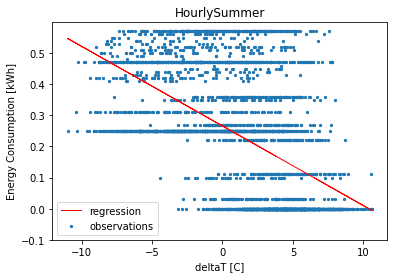

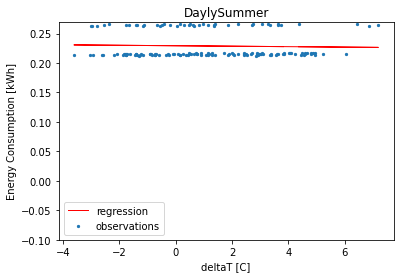

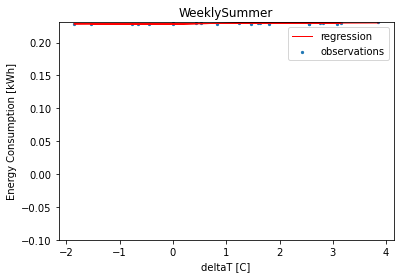

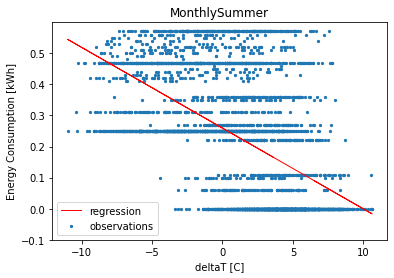

In [6]:
plotting(dataHS,'HourlySummer')
plotting(dataDS, 'DaylySummer')
plotting(dataWS, 'WeeklySummer')
plotting(dataMS, 'MonthlySummer')

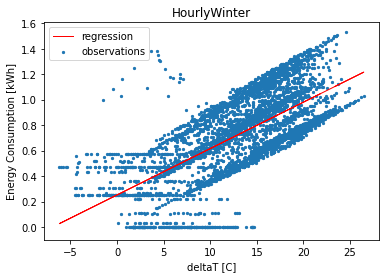

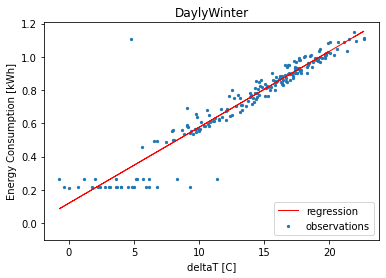

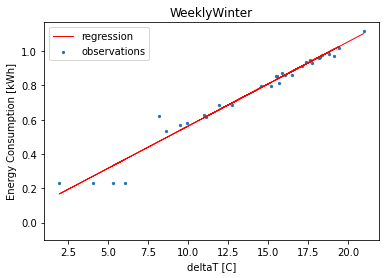

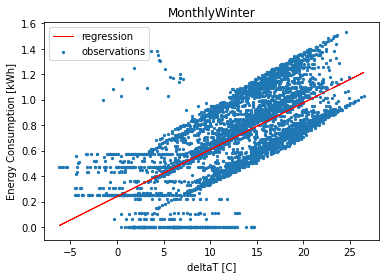

In [7]:
plotting(dataHW,'HourlyWinter')
plotting(dataDW,'DaylyWinter')
plotting(dataWW,'WeeklyWinter')
plotting(dataMW,'MonthlyWinter')